In [1]:
pip install tensorflow


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from math import sqrt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU


In [8]:

# STEP 2 — Load Dataset

path = r"D:\data science\Assignments\assignment pnyb\monthly_milk_production (1).csv"
df = pd.read_csv(r"D:\data science\Assignments\assignment pnyb\monthly_milk_production (1).csv")

print("Dataset Shape:", df.shape)
print("\nColumns:", df.columns)

# Convert date column
df['Date'] = pd.to_datetime(df['Date'])

# Set index
df.set_index('Date', inplace=True)

# Standardize production column name
df.rename(columns={'Production': 'Milk_Production'}, inplace=True)

print("\nData Preview:")
print(df.head())
print("\nInfo:")
print(df.info())


Dataset Shape: (168, 2)

Columns: Index(['Date', 'Production'], dtype='object')

Data Preview:
            Milk_Production
Date                       
1962-01-01              589
1962-02-01              561
1962-03-01              640
1962-04-01              656
1962-05-01              727

Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 1962-01-01 to 1975-12-01
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Milk_Production  168 non-null    int64
dtypes: int64(1)
memory usage: 2.6 KB
None



Summary Statistics:
       Milk_Production
count       168.000000
mean        754.708333
std         102.204524
min         553.000000
25%         677.750000
50%         761.000000
75%         824.500000
max         969.000000

Missing Values:
Milk_Production    0
dtype: int64


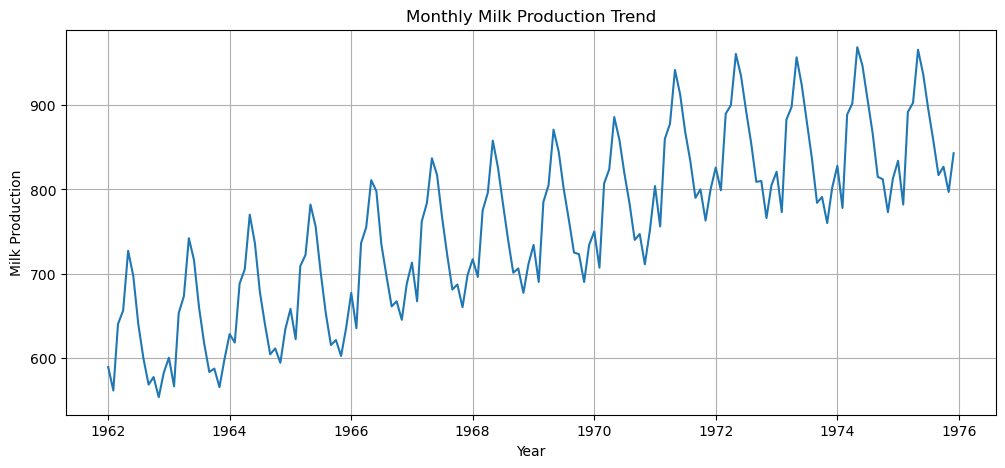

In [10]:


# STEP 3 — Exploratory Data Analysis (EDA)


print("\nSummary Statistics:")
print(df.describe())

print("\nMissing Values:")
print(df.isnull().sum())

plt.figure(figsize=(12,5))
plt.plot(df['Milk_Production'])
plt.title("Monthly Milk Production Trend")
plt.xlabel("Year")
plt.ylabel("Milk Production")
plt.grid(True)
plt.show()



In [11]:

# STEP 4 — Normalize Data


scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df[['Milk_Production']])

print("Scaled shape:", scaled_data.shape)


Scaled shape: (168, 1)


In [12]:

# STEP 5 — Create Time-Window Sequences


def create_sequences(data, time_steps):
    X, y = [], []
    for i in range(len(data)-time_steps):
        X.append(data[i:i+time_steps, 0])
        y.append(data[i+time_steps, 0])
    return np.array(X), np.array(y)

TIME_STEPS = 12   # 12 months (1 year lookback)

X, y = create_sequences(scaled_data, TIME_STEPS)

# reshape for deep learning models
X = X.reshape((X.shape[0], X.shape[1], 1))

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (156, 12, 1)
y shape: (156,)


In [13]:

# STEP 6 — Train / Test Split

train_size = int(len(X) * 0.80)

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)


Train size: (124, 12, 1)
Test size: (32, 12, 1)


In [14]:

# STEP 7 — Build MODELS


def build_and_train(model_name, layer):
    model = Sequential([
        layer,
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    
    history = model.fit(
        X_train, y_train,
        epochs=50,
        batch_size=16,
        validation_split=0.1,
        verbose=1
    )
    
    print(f"\n{model_name} training complete.")
    return model, history


rnn_model, history_rnn = build_and_train(
    "RNN",
    SimpleRNN(64, activation='tanh', input_shape=(TIME_STEPS,1))
)

lstm_model, history_lstm = build_and_train(
    "LSTM",
    LSTM(64, activation='tanh', input_shape=(TIME_STEPS,1))
)

gru_model, history_gru = build_and_train(
    "GRU",
    GRU(64, activation='tanh', input_shape=(TIME_STEPS,1))
)


Epoch 1/50


C:\Users\Lenovo\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0358 - val_loss: 0.0503
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0104 - val_loss: 0.0100
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0071 - val_loss: 0.0033
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0041 - val_loss: 0.0052
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0027 - val_loss: 0.0034
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0024 - val_loss: 0.0037
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0021 - val_loss: 0.0028
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0020 - val_loss: 0.0032
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0018 - val_loss: 0.0026
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0017 - val_loss: 0.0031
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0018 - val_loss: 0.0025
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0019 - val_loss: 0.0025
Epoch 13/50


In [17]:

# STEP 8 — Evaluation Function

def evaluate_model(model, X_test, y_test, name):
    
    preds = model.predict(X_test)

    y_true = scaler.inverse_transform(y_test.reshape(-1,1))
    y_pred = scaler.inverse_transform(preds)

    rmse = sqrt(mean_squared_error(y_true, y_pred))
    mae  = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print(f"\n===== {name} PERFORMANCE =====")
    print("RMSE:", round(rmse,3))
    print("MAE :", round(mae,3))
    print("MAPE:", round(mape,3), "%")

    plt.figure(figsize=(10,4))
    plt.plot(y_true, label="Actual")
    plt.plot(y_pred, label="Predicted")
    plt.title(f"{name} — Actual vs Predicted")
    plt.legend()
    plt.show()

    return rmse, mae, mape


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step

===== RNN PERFORMANCE =====
RMSE: 16.926
MAE : 14.449
MAPE: 1.682 %


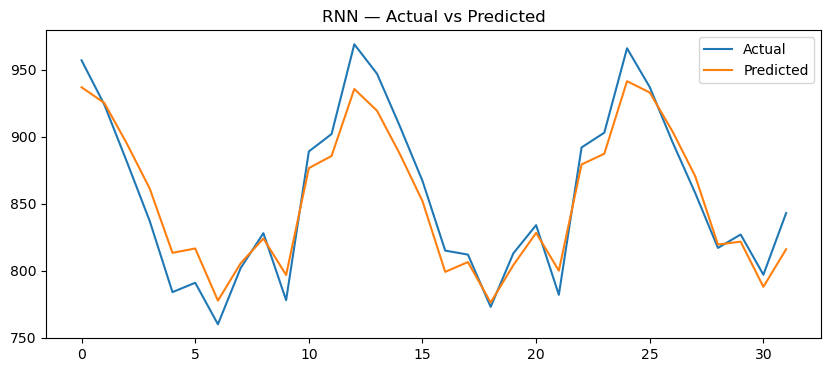

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step

===== LSTM PERFORMANCE =====
RMSE: 37.402
MAE : 29.549
MAPE: 3.539 %


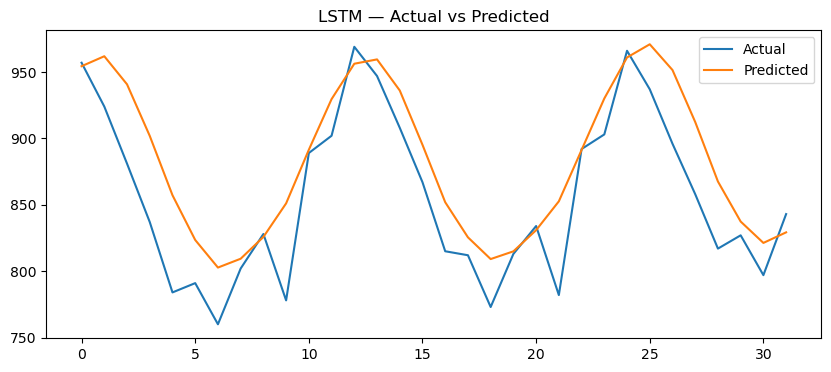

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step

===== GRU PERFORMANCE =====
RMSE: 31.487
MAE : 24.357
MAPE: 2.874 %


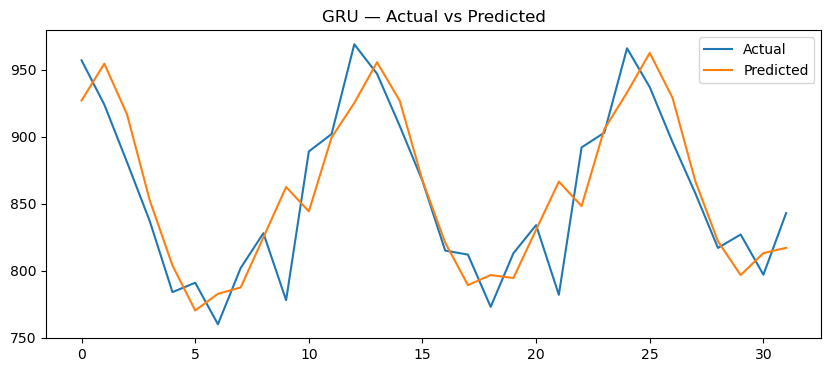


Model Comparison:
RNN -> (16.925623077338113, 14.44867706298827, np.float64(1.6817844906480999))
LSTM -> (37.401589470675134, 29.54912757873534, np.float64(3.5389571362724914))
GRU -> (31.48718581361364, 24.35660743713378, np.float64(2.873652660370388))


In [18]:

# STEP 9 — Evaluate All Models


results = {}

results["RNN"]  = evaluate_model(rnn_model,  X_test, y_test, "RNN")
results["LSTM"] = evaluate_model(lstm_model, X_test, y_test, "LSTM")
results["GRU"]  = evaluate_model(gru_model,  X_test, y_test, "GRU")

print("\nModel Comparison:")
for k,v in results.items():
    print(k, "->", v)


In [19]:
# STEP 10 — Choose Best Model (LSTM default)

best_model = lstm_model   

In [21]:

# STEP 11 — Forecast Next 12 Months


last_sequence = scaled_data[-TIME_STEPS:]
future_input = last_sequence.reshape(1, TIME_STEPS, 1)

future_predictions = []

for _ in range(12):

    pred = best_model.predict(future_input, verbose=0)

    # store prediction
    future_predictions.append(pred[0,0])

    # reshape pred to match (1,1,1)
    pred_reshaped = pred.reshape(1,1,1)

    # slide window + append prediction
    future_input = np.concatenate(
        (future_input[:,1:,:], pred_reshaped),
        axis=1
    )

future_values = scaler.inverse_transform(
    np.array(future_predictions).reshape(-1,1)
)

print("\nNext 12-Month Forecast:")
print(future_values)




Next 12-Month Forecast:
[[846.6743 ]
 [865.06506]
 [916.17725]
 [947.4242 ]
 [975.8009 ]
 [973.0387 ]
 [952.98206]
 [923.12555]
 [892.2978 ]
 [875.21625]
 [860.13885]
 [869.0457 ]]


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12432\2971343205.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_index = pd.date_range(


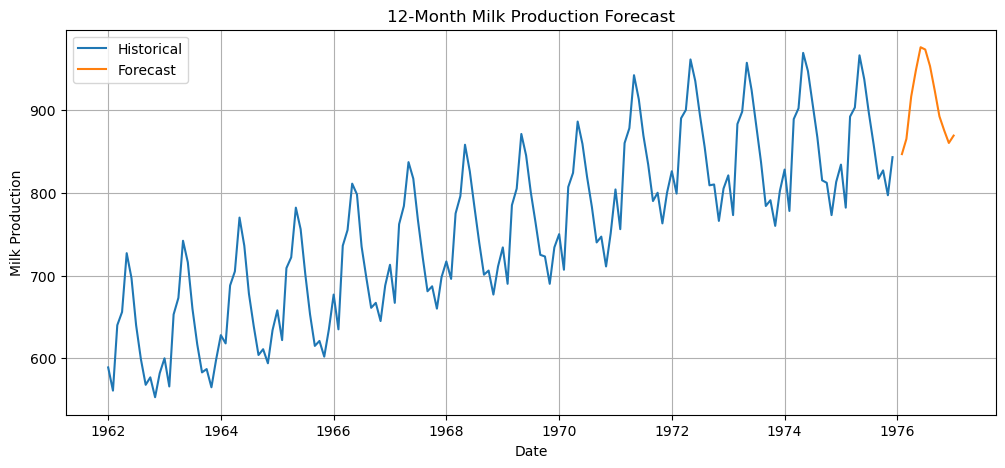

In [22]:

# STEP 12 — Plot Forecast


future_index = pd.date_range(
    start=df.index[-1],
    periods=12+1,
    freq="M"
)[1:]

plt.figure(figsize=(12,5))
plt.plot(df.index, df['Milk_Production'], label="Historical")
plt.plot(future_index, future_values, label="Forecast")
plt.title("12-Month Milk Production Forecast")
plt.xlabel("Date")
plt.ylabel("Milk Production")
plt.legend()
plt.grid(True)
plt.show()


In [23]:

# STEP 13 — Business Insights

print("\nBUSINESS INSIGHTS")
print("- Strong yearly seasonality observed in production")
print("- LSTM / GRU models capture long-term patterns better than RNN")
print("- Forecast helps in:")
print("  • Supply chain & distribution planning")
print("  • Inventory & storage optimization")
print("  • Workforce scheduling")
print("  • Reducing wastage and over-production")
print("\nRecommendation: retrain model monthly with new production data.")



BUSINESS INSIGHTS
- Strong yearly seasonality observed in production
- LSTM / GRU models capture long-term patterns better than RNN
- Forecast helps in:
  • Supply chain & distribution planning
  • Inventory & storage optimization
  • Workforce scheduling
  • Reducing wastage and over-production

Recommendation: retrain model monthly with new production data.
